Integrantes

- Juan Diego Castañeda Oviedo
- Juan Sebastian Silva Castillo
- Diego Nicolas Rubio Lopez

# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [ ]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [ ]:
import numpy as np

In [ ]:
def polynolial_design_matrix(x, m):
    '''
    Constructing design polynolial matrix for given nodes and power
    '''
    x = np.array(x)
    A = []
    for k in range(m+1):
        A.append(x**k)
        
    return np.array(A).T

In [ ]:
def normal_eq_solution(A,b):
    x = np.dot(np.linalg.inv(A.T @ A) @ A.T, b)
    res = np.linalg.norm(A @ x - b)
    return x, res

In [ ]:
ms = range(1,10)
coef = [normal_eq_solution(polynolial_design_matrix(x,m), y) for m in ms]

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [ ]:
for a in coef:
    print(a[1]/(16 - len(a[0])))

0.5638018817879079
0.43442508405930796
0.03223727022631271
0.033656564378641424
0.03549656220020561
0.03588688045729663
0.03919349715902612
0.04065424160745155
0.04642385374992531


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

In [ ]:
import numpy.polynomial.polynomial as pm
import matplotlib.pyplot as plt

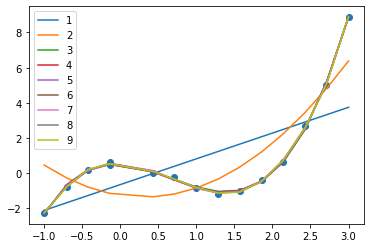

In [ ]:
plt.scatter(x,y)

for pol in coef:
    pl = pm.polyval(x,pol[0])
    plt.plot(x,pl)

plt.legend(list(ms))
plt.show()

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [ ]:
def qr_lls(A, b):
    m = A.shape[1]
    q, r = np.linalg.qr(A)
    f = (q.T @ b)[:m]
    return np.linalg.solve(r[:m], f)

In [ ]:
c = qr_lls(polynolial_design_matrix(x,3), y)
print(c-coef[2][0])

[-1.32116540e-14 -1.60982339e-15  4.44089210e-14 -1.48769885e-14]


# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [ ]:
def lagr_poly(grid, k, x):
    
    poly = 1
    for i in range(len(grid)):
        if i!=k:
            poly*=x-grid[i]
            poly/=grid[k]-grid[i]    
            
    return poly

In [ ]:
def lagr_interp(grid, x, y):
    y_interp = np.zeros(len(x))
    for i in range(len(grid)):
        y_interp+=y[i]*lagr_poly(grid,i,x)
    return y_interp

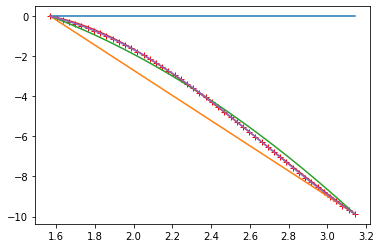

In [ ]:
f = lambda x:x**2*np.cos(x)
x = np.linspace(np.pi/2,np.pi, 50)
plt.plot(x,f(x), "r+")

for m in range(1,6):
    grid = np.linspace(np.pi/2,np.pi, m)
    plt.plot(x, lagr_interp(grid, x, f(grid)))


### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [ ]:
def chebishev_nodes(a,b,m):
    k = np.array(range(m))
    x = np.cos(2*k+1/m)
    return (x+1)*(b-a)/2 + a

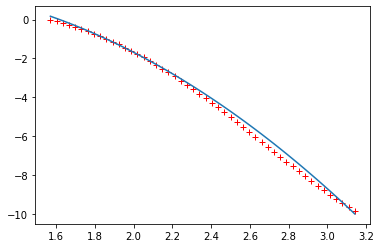

In [ ]:
grid = chebishev_nodes(np.pi/2, np.pi, 3)

plt.plot(x,f(x), "r+")
plt.plot(x, lagr_interp(grid, x, f(grid)))

##Submissions

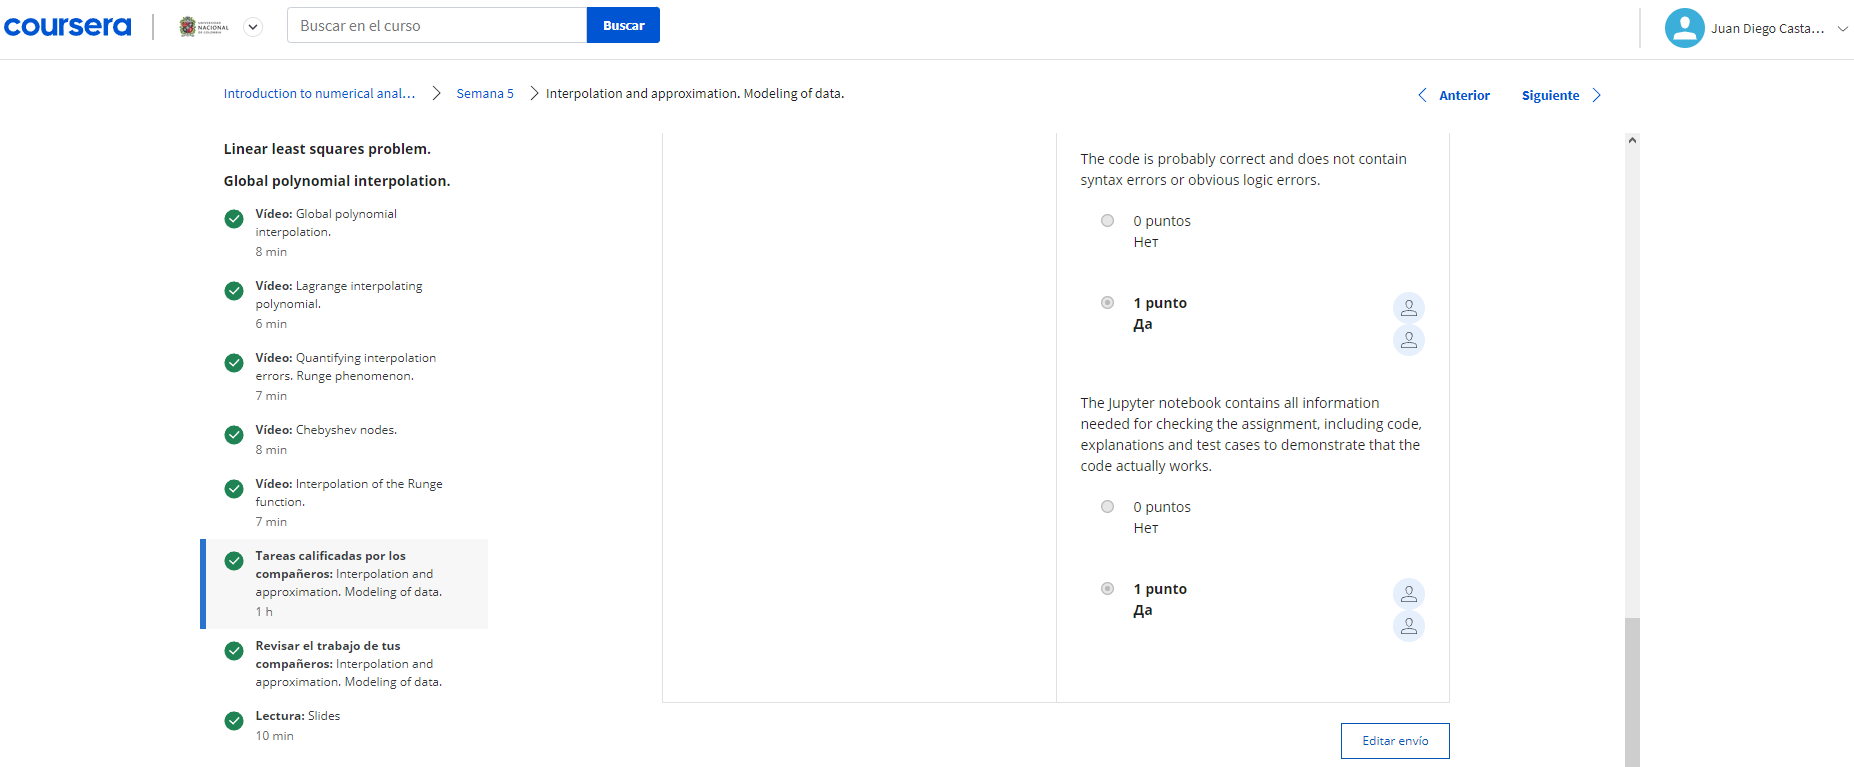

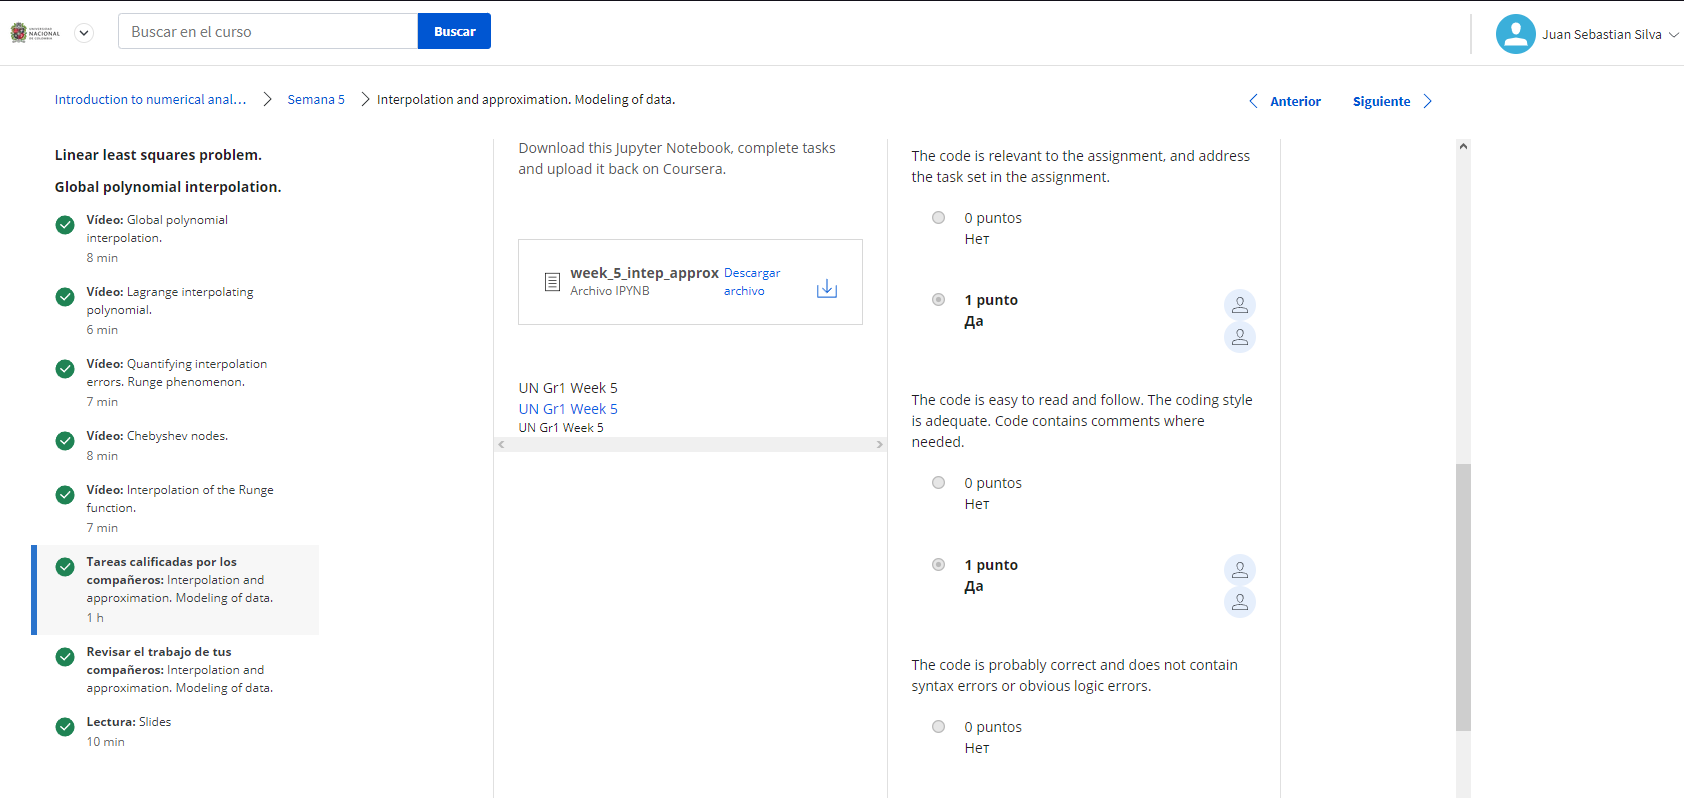

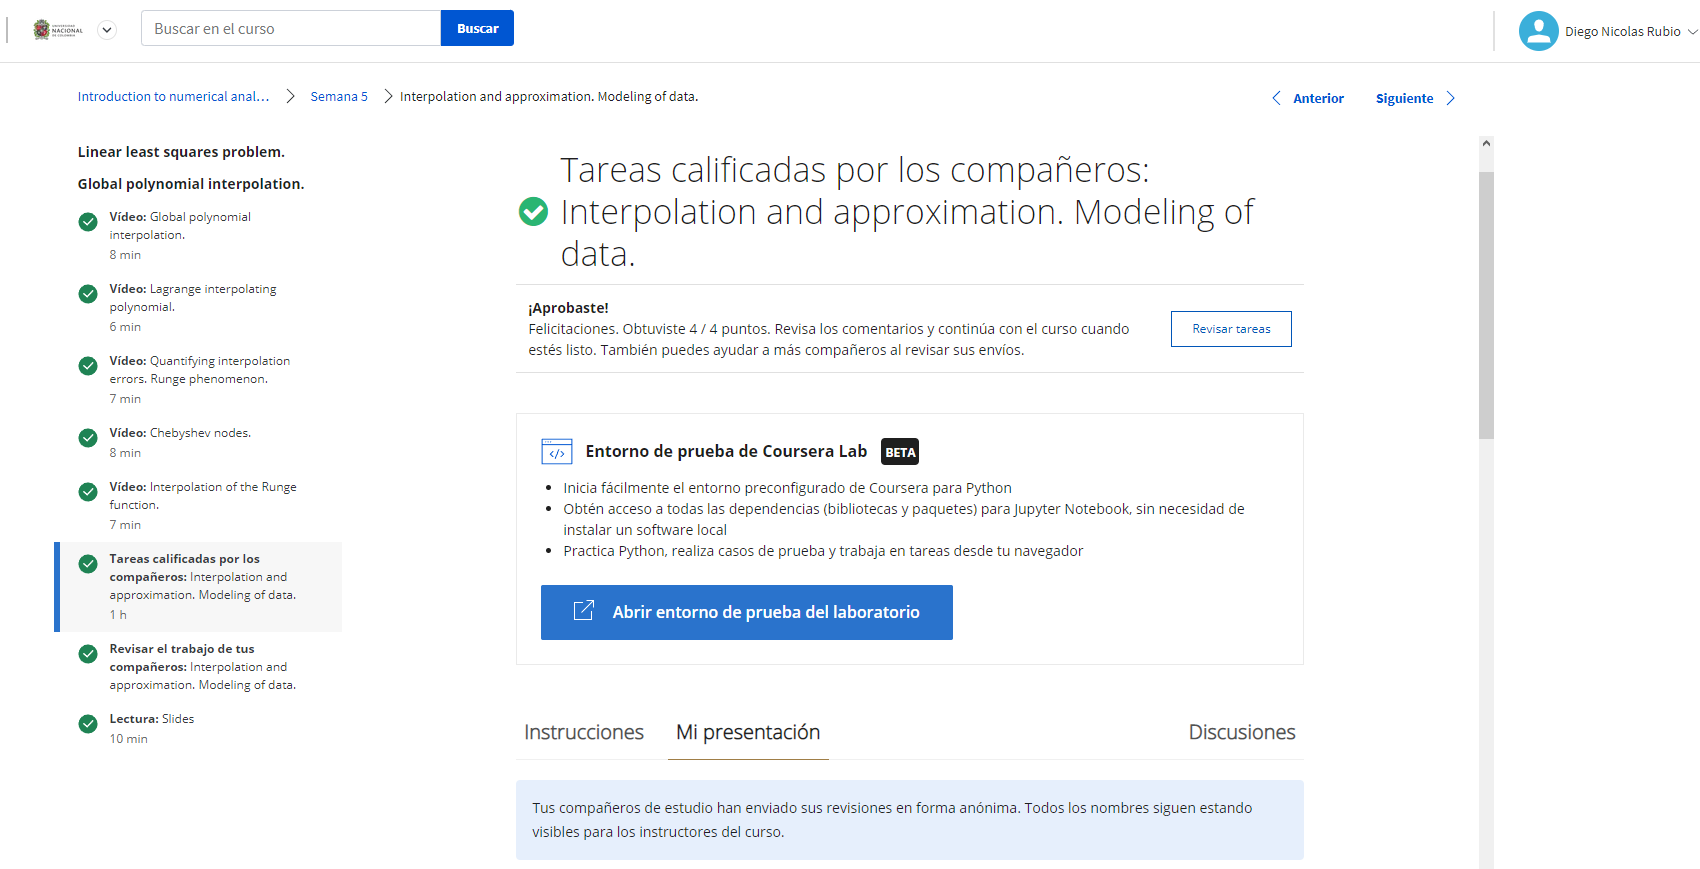